## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
# Display all of the columns
pd.set_option('display.max_columns', None)
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

2023-05-25 14:46:10.618187: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 14:46:12.104813: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-25 14:46:12.110004: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN','NAME'],axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
# application_info = application_df.columns.values.tolist()
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
at_vc = application_df['APPLICATION_TYPE'].value_counts()
at_vc

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = at_vc[at_vc < 500].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [7]:
# Look at CLASSIFICATION value counts for binning
c_vc= application_df['CLASSIFICATION'].value_counts()

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
c_vc[c_vc > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = c_vc[c_vc < 1000].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_d = pd.get_dummies(application_df)

In [11]:
application_df_d

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [110]:
# Split our preprocessed data into our features and target arrays
y = application_df_d["IS_SUCCESSFUL"].values
X = application_df_d.drop(["IS_SUCCESSFUL", 'SPECIAL_CONSIDERATIONS_Y'],axis=1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=73)

In [111]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [128]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
hidden_nodes_layer1 = 512
hidden_nodes_layer2 = 512//2
hidden_nodes_layer3 = 512//4
hidden_nodes_layer4 = 512//8
hidden_nodes_layer5 = 512//16

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))
nn.add(tf.keras.layers.BatchNormalization())
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))
nn.add(tf.keras.layers.BatchNormalization())
# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))
nn.add(tf.keras.layers.BatchNormalization())
# hidden layer 4
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation='relu'))
nn.add(tf.keras.layers.BatchNormalization())
# hidden layer 5
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

# Output layer"
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 512)               22016     
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_62 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_63 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_8 (Batc  (None, 128)            

In [129]:
# nn = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(756, activation='relu', input_shape=X_train_scaled[0].shape),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(756//2, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(756//4, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(756//8, activation='relu'),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dense(756//10, activation='relu'),   
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# print(nn.summary())

In [130]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [131]:
#add halt training method to reduce unneeded epochs based on loss plateau https://stackoverflow.com/questions/66530274/tricks-to-improve-cnn-model-performance
es=tf.keras.callbacks.EarlyStopping( monitor="val_loss", patience=10,
                                     verbose=1,  restore_best_weights=True)
rlronp=tf.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.3, patience=1,
                                             verbose=1)
callbacks=[es, rlronp]

In [132]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=callbacks, validation_data=(X_test_scaled,y_test))
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - 14s 15ms/step - loss: 0.5787 - accuracy: 0.7183 - val_loss: 0.5629 - val_accuracy: 0.7234 - lr: 0.0010
Epoch 2/100
804/804 [==============================] - 14s 17ms/step - loss: 0.5632 - accuracy: 0.7239 - val_loss: 0.5589 - val_accuracy: 0.7276 - lr: 0.0010
Epoch 3/100
804/804 [==============================] - 13s 16ms/step - loss: 0.5608 - accuracy: 0.7247 - val_loss: 0.5560 - val_accuracy: 0.7294 - lr: 0.0010
Epoch 4/100
802/804 [============================>.] - ETA: 0s - loss: 0.5573 - accuracy: 0.7282
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
804/804 [==============================] - 10s 13ms/step - loss: 0.5575 - accuracy: 0.7281 - val_loss: 0.5574 - val_accuracy: 0.7315 - lr: 0.0010
Epoch 5/100
804/804 [==============================] - 12s 14ms/step - loss: 0.5512 - accuracy: 0.7294 - val_loss: 0.5535 - val_accuracy: 0.7319 - lr: 3.0000e-04
Epoch 6/100
804/804 [========================

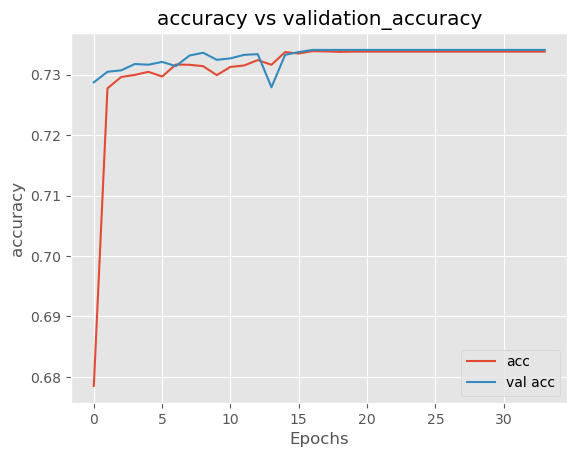

In [127]:
# Plot the model history 
plt.style.use('ggplot')
plt.plot(fit_model.history['accuracy'], label = 'acc')
plt.plot(fit_model.history['val_accuracy'], label='val acc')
plt.title("accuracy vs validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [34]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization2.h5")

In [80]:
from keras.models import load_model
model0 = load_model('AlphabetSoupCharity.h5')
X = application_df_d.drop(["IS_SUCCESSFUL"],axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58)
X_scaler = scaler.fit(X_train)
X_test_scaled = X_scaler.transform(X_test)
score = model0.evaluate(X_test_scaled, y_test, verbose=0)
print ("%s: %.2f%%" % (model0.metrics_names[1], score[1]*100))
model0.summary()

accuracy: 73.20%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 352       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [55]:
model1 = load_model('AlphabetSoupCharity_Optimization1.h5')
X = application_df_d.drop(["IS_SUCCESSFUL", 'SPECIAL_CONSIDERATIONS_Y'],axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58)
X_scaler = scaler.fit(X_train)
X_test_scaled = X_scaler.transform(X_test)
score = model1.evaluate(X_test_scaled, y_test, verbose=0)
print ("%s: %.2f%%" % (model1.metrics_names[1], score[1]*100))
model1.summary()


accuracy: 73.78%
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 512)               22016     
                                                                 
 batch_normalization_4 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_127 (Dense)           (None, 256)               131328    
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_128 (Dense)           (None, 128)               32896     
                                                                 
 batch_normalization_6 (Batc  (None,

In [47]:
model2 = load_model('AlphabetSoupCharity_Optimization2.h5')

score = model2.evaluate(X_test_scaled, y_test, verbose=0)
print ("%s: %.2f%%" % (model2.metrics_names[1], score[1]*100))
model2.summary()

accuracy: 73.26%
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              44032     
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 1

In [81]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=58)

forest = RandomForestClassifier(n_estimators=100, random_state=100)
forest.fit(X_train,y_train)
predictions = forest.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.714868804664723
